In [1]:
import pandas as pd
import numpy as np
from fastparquet import ParquetFile

In [2]:
pf = ParquetFile("nyt_data.parquet")

pf.head(1)

# #for df in pf.iter_row_groups():
# df = next(iter(pf.iter_row_groups()))
# df.head()


,year,title,excerpt
0,1920,At last the Federal Reserve Board has issued r...,


In [3]:
df = pf.to_pandas(columns=['year','title'])

In [ ]:
# total rows
df.shape

(17370913, 2)

In [24]:
# any duplicates?
dups = df.groupby(by='title').size()
dups.shape

(10718164,)

In [ ]:
# that's a lot of duplicates... how many per title?
dups.sort_values(ascending=False).head()

# 13372 is a lot of dups. 
# Are they actually the same article? 
# Should we ignore generic No Titles?

title
Article 1 -- No Title                  13372
Birth Notice 1 -- No Title             12239
Article 2 -- No Title                  12043
Marriage Announcement 1 -- No Title    11407
Article 3 -- No Title                  11302
dtype: int64

In [ ]:
# how many per year?
years = df.groupby(by="year").count()
years.to_csv("years.csv")
years

,title
year,
1920,133572
1921,153635
1922,109718
1923,107760
1924,10552
...,...
2016,105606
2017,91092
2018,50857


<Axes: xlabel='year'>

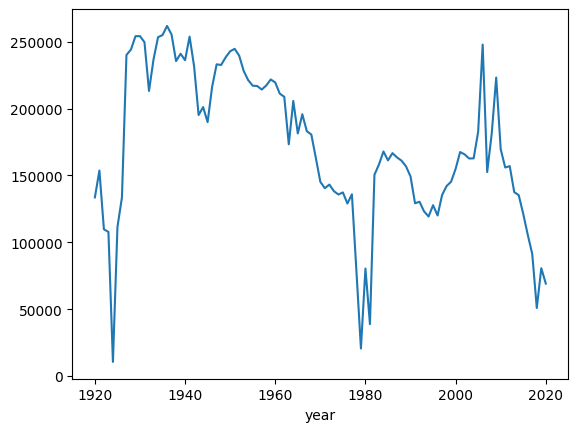

In [ ]:
# there seems to be no gaps within the years
df.groupby(by="year")['title'].count().plot.line()